# 7. 머신러닝 프로세스4: 모델훈련과 세부튜닝

## 7-1. 데이터 불러오기 및 데이터셋 분할

#### LogisticRegression 모델의 핵심 하이퍼파라미터 : C
##### 하이퍼파라미터 찾는 방법
1. 그리드 탐색 (Grid Search)
2. 랜덤 탐색 (random Search)

In [2]:
#데이터 불러오기
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
data = pd.read_csv("../제공자료/Fvote.csv", encoding ='utf-8')
data

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,1,0,0,0,0,1,1,4,4,3,3,1.8,1,2
207,0,1,0,0,0,1,0,2,1,2,3,4,2.6,1,4
208,0,1,1,0,0,0,0,2,1,2,3,3,2.6,1,2
209,0,1,0,0,0,1,0,2,3,4,3,2,4.0,1,4


In [3]:
# 특성치와 레이블 데이터셋 구분
X=data[data.columns[1:13]]
y=data[['vote']]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42 )

## 7-2. Grid Search
: 분석자가 하이퍼파라미터의 특정 값을 지정하고, 각각 모델에 적용해 모델적합도를 비교
###### {'hyperparameter': [value_1, value_2, ... , value_n]}

In [8]:
# 그리드서치를 위한 라이브러리 및 탐색 하이퍼파라미터 설정
from sklearn.model_selection import GridSearchCV
param_grid ={'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [6]:
# LogisticRegression 알고리즘 적용
from sklearn.linear_model import LogisticRegression

#### GridSearchCV(모델명(), param_grid, cv=5, return_train_score =True)
: 교차검증 5로 설정하고 훈련데이터 결과 정확도 제시 True

In [10]:
# 그리드서치를 로지스틱 모델에 적용하여 훈련데이터 학습
# 교차검증(cv) 5 설정, 훈련데이터 정확도 결과 제시하기(True)
grid_search=GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

##### 정확도가 가장 높은 하이퍼파라미터 무엇인지 -> 'grid_search.best_params_'
##### 정확도는 'grid_search.best_score_'

In [11]:
print("Best parametrer: {}".format(grid_search.best_params_))
print("BEst Cross_validity Score: {:.3f}".format(grid_search.best_score_))

Best parametrer: {'C': 10}
BEst Cross_validity Score: 0.727


In [12]:
# 테스트 데이터에 적용(C=10), 정확도 결과
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.679


In [18]:
# 그리드서치 하이퍼파라미터별 상세 결과값
result_grid = pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004400,0.000489,0.001599,4.889673e-04,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.004214,0.000752,0.000997,3.560668e-06,0.01,{'C': 0.01},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
2,0.006590,0.000488,0.001000,1.168008e-07,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,...,0.721573,0.030797,3,0.738095,0.746032,0.738095,0.740157,0.716535,0.735783,0.010053
3,0.009606,0.001029,0.001002,5.094799e-06,1,{'C': 1},0.71875,0.68750,0.78125,0.580645,...,0.714919,0.079466,4,0.738095,0.793651,0.730159,0.763780,0.724409,0.750019,0.025634
4,0.013394,0.001345,0.001001,1.101896e-06,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
5,0.016399,0.003929,0.006002,7.238767e-03,100,{'C': 100},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


In [39]:
# 하이퍼파리미터(C)값에 따른 훈련데이터와 테스트데이터의 정확도(accuracy) 그래프
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()

KeyError: 'C'

## 7-3. Random Search

In [ ]:
# 랜덤서치를 위한 라이브러리 및 탐색 하이퍼파라미터 설정
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs={'C': randint(low=0.001, high=100)}

In [21]:
# LogisticRegression 알고리즘 적용
from sklearn.linear_model import LogisticRegression


In [24]:

# 랜덤서치를 로지스틱 모델에 적용하여 훈련데이터 학습
# 교차검증(cv) 5 설정, 훈련데이터 정확도 결과 제시하기(True)
random_search=RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=param_distribs, cv=5,
                                 # n_iter=100, 랜덤횟수 디폴트=10
                                return_train_score=True)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023D536B0DF0>},
                   return_train_score=True)

In [28]:
# 정확도가 가장 높은 하이퍼파라미터(C) 및 정확도 제시
print("Best Parameter: {}".format(random_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Parameter: {'C': 6}
Best Cross-validity Score: 0.727


In [31]:
# 테스트 데이터에 최적 텀색 하이퍼 파라미터 적용 정확도 결과
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.679


In [61]:
# 랜덤서치 하이퍼파라미터별 상세 결과값
result_random = random_search.cv_results_
result_random=pd.DataFrame(result_random)

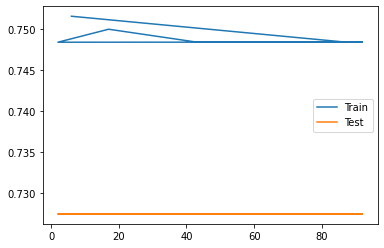

In [62]:
# 하이퍼파리미터(C)값에 따른 훈련데이터와 테스트데이터의 정확도(accuracy) 그래프
import matplotlib.pyplot as plt

plt.plot(result_random['param_C'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_C'], result_random['mean_test_score'], label="Test")
plt.legend()